In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
from feupy.catalog.pulsar.atnf import SourceCatalogATNF

from feupy.target import Target

from feupy.plotters import *

from feupy.utils.string_handling import name_to_txt

from feupy.analysis import CounterpartsConfig, Counterparts
from feupy.roi import ROI

from astropy import units as u

from gammapy.utils.scripts import make_path
from gammapy.datasets import Datasets
from gammapy.modeling.models import SkyModel, ExpCutoffPowerLawSpectralModel

In [4]:
catalog = SourceCatalogATNF()

In [5]:
catalog.table

JNAME,RAJ2000,RAJ2000_ERR,DEJ2000,DEJ2000_ERR,DIST,DIST_DM,AGE,P0,P0_ERR,BSURF,EDOT,TYPE,ASSOC
,deg,deg,deg,deg,kpc,kpc,yr,s,s,G,erg / s,,
bytes16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes7,bytes12
PSR J0002+6216,0.742,0.000,62.269,0.000,6.357,6.357,3.063e+05,0.115,1.331e-12,8.396e+11,1.534e+35,HE,GRS
PSR J0006+1834,1.520,0.001,18.583,0.001,0.860,0.860,5.242e+06,0.694,1.400e-10,1.221e+12,2.479e+32,None,None
PSR J0007+7303,1.757,0.001,73.052,0.000,1.400,--,1.389e+04,0.316,2.993e-10,1.080e+13,4.514e+35,NRAD,GRS
PSR J0011+08,2.892,0.475,8.167,0.133,5.399,5.399,--,2.553,--,--,--,None,None
PSR J0012+5431,3.097,0.000,54.530,0.001,5.425,5.425,3.741e+08,3.025,1.830e-10,6.300e+11,1.827e+29,RRAT,None
PSR J0014+4746,3.574,0.000,47.776,0.000,1.776,1.776,3.483e+07,1.241,1.078e-11,8.468e+11,1.167e+31,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSR J2352+65,358.000,--,65.000,--,3.058,3.058,--,1.164,--,--,--,None,None


In [6]:
target = catalog["PSR J1826-1334"]

In [7]:
print(target.info())


*** Basic info ***

Catalog row index (zero-based) : 2095
Source name : PSR J1826-1334

*** Position info ***

RA: 276.555 deg +- 0.000 deg
DEC: -13.580 deg +- 0.000 deg

*** Timing and profile info ***

P0: 1.015e-01 +- 2.060e-13 s

*** Distance info ***

Dist: 3.61e+00 kpc
Dist_DM: 3.61e+00 kpc

*** Associations and survey info ***

Assoc: GR
Type: HE

*** Derived parameters info ***

Age: 2.14e+04 yr
BSurf: 2.80e+12 G
Edot: 2.84e+36 erg / s



In [8]:
target_name = target.name
target_name

'PSR J1826-1334'

In [9]:
target_pos = target.position
target_pos

<SkyCoord (ICRS): (ra, dec) in deg
    (276.55489583, -13.57966667)>

In [10]:
pos_ra = target_pos.ra
pos_dec = target_pos.dec

In [11]:
target_model = SkyModel(
    spectral_model=ExpCutoffPowerLawSpectralModel(), 
    name=target_name
)

In [12]:
print(target_model)

SkyModel

  Name                      : PSR J1826-1334
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.500   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.100   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [13]:
target = Target(
    target_name, 
    pos_ra, 
    pos_dec, 
    spectral_model=target_model.spectral_model
)
print(target)


*** Basic info ***

Source name : PSR J1826-1334

*** Position info ***

RA: 276.555 deg
DEC: -13.580 deg

*** Spectral info ***

Spectrum type:  ExpCutoffPowerLawSpectralModel
index: 1.5 +- 0 
amplitude: 1e-12 +- 0 TeV⁻¹ s⁻¹ cm⁻²
reference: 1.0 +- 0 TeV
lambda_: 0.1 +- 0 TeV⁻¹
alpha: 1.0 +- 0 



In [14]:
radius = 1*u.deg 

In [15]:
roi = ROI(target, radius)

In [16]:
print(roi.info)

Target:

*** Basic info ***

Source name : PSR J1826-1334

*** Position info ***

RA: 276.555 deg
DEC: -13.580 deg

*** Spectral info ***

Spectrum type:  ExpCutoffPowerLawSpectralModel
index: 1.5 +- 0 
amplitude: 1e-12 +- 0 TeV⁻¹ s⁻¹ cm⁻²
reference: 1.0 +- 0 TeV
lambda_: 0.1 +- 0 TeV⁻¹
alpha: 1.0 +- 0 

Region:
radius = 1.00deg



In [17]:
roi.dict

{'target': {'name': 'PSR J1826-1334',
  'position': {'lon': <Longitude 276.55489583 deg>,
   'lat': <Latitude -13.57966667 deg>,
   'frame': 'icrs'},
  'model': {'name': 'PSR J1826-1334',
   'type': 'SkyModel',
   'spectral': {'type': 'ExpCutoffPowerLawSpectralModel',
    'parameters': [{'name': 'index', 'value': 1.5},
     {'name': 'amplitude', 'value': 1e-12, 'unit': 'TeV-1 s-1 cm-2'},
     {'name': 'reference', 'value': 1.0, 'unit': 'TeV'},
     {'name': 'lambda_', 'value': 0.1, 'unit': 'TeV-1'},
     {'name': 'alpha', 'value': 1.0}]}}},
 'radius': <Quantity 1. deg>}

In [18]:
config = CounterpartsConfig()

In [19]:
config.roi = roi.dict

In [20]:
print(config)

CounterpartsConfig

    general:
        log: {level: info, filename: null, filemode: null, format: null, datefmt: null}
        outdir: .
        path_file: null
    roi:
        target:
            name: PSR J1826-1334
            position: {frame: icrs, lon: 276.55489583333326 deg, lat: -13.579666666666666
                    deg}
            model:
                name: PSR J1826-1334
                type: SkyModel
                spectral:
                    type: ExpCutoffPowerLawSpectralModel
                    parameters:
                    - {name: index, value: 1.5}
                    - {name: amplitude, value: 1.0e-12, unit: TeV-1 s-1 cm-2}
                    - {name: reference, value: 1.0, unit: TeV}
                    - {name: lambda_, value: 0.1, unit: TeV-1}
                    - {name: alpha, value: 1.0}
        radius: 1.0 deg
        catalogs: all
        dict_sep: {}
        leg_style: {}
    energy_range: {min: null, max: null}
    


In [21]:
config.roi.catalogs = "all"

In [22]:
e_edges_min=0.1*u.TeV 
config.energy_range.min = e_edges_min

# e_edges_max=100.*u.TeV
# config.energy_range.max = e_edges_max

In [23]:
analysis_path = make_path(f"./{name_to_txt(target_name)}")
analysis_path.mkdir(parents=True, exist_ok=True)

In [24]:
config.general.path_file = analysis_path

In [25]:
config.write(overwrite=True)

In [26]:
analysis = Counterparts(config)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [27]:
analysis.run()

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


The error is: (2HWC J1825-134) 'SourceCatalogObject2HWC' object has no attribute 'flux_points'
The error is: (3FGL J1823.2-1339) index -1 is out of bounds for axis 0 with size 0
The error is: (3FGL J1824.5-1351e) index -1 is out of bounds for axis 0 with size 0


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


The error is: (3FGL J1826.1-1256) index -1 is out of bounds for axis 0 with size 0


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


The error is: (3HWC J1825-134) 'SourceCatalogObject3HWC' object has no attribute 'flux_points'


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


Total number of gamma sources: 19
Total number of flux points tables: 19
Total number of pulsars: 8


In [28]:
analysis.df_sep

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,HESS J1826-130: gamma-cat,276.504181,-13.091110,0.491042
1,HESS J1825-137: gamma-cat,276.554413,-13.580040,0.000600
2,HESS J1825-137: hgps,276.259552,-13.965834,0.481050
3,HESS J1826-130: hgps,276.508728,-13.017380,0.564079
4,4FGL J1823.3-1340,275.836304,-13.667600,0.703888
5,4FGL J1824.1-1304,276.032196,-13.072000,0.718627
6,4FGL J1824.4-1350e,276.110992,-13.839000,0.503225
7,4FGL J1826.1-1256,276.535187,-12.941500,0.638455
8,4FGL J1828.1-1312,277.027588,-13.201900,0.595114
9,2FHL J1824.5-1350e,276.130005,-13.850000,0.493421


In [29]:
len(analysis.sources)

19

In [30]:
len(analysis.datasets)

19

In [31]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: gamma-cat
  Instrument : 
  Models     : ['HESS_J1826-130_gamma-cat_ecpl']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137: gamma-cat
  Instrument : 
  Models     : ['HESS_J1825-137_gamma-cat_ecpl']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137: hgps
  Instrument : 
  Models     : ['HESS_J1825-137_hgps_ecpl']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: hgps
  Instrument : 
  Models     : ['HESS_J1826-130_hgps_pl']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1823.3-1340
  Instrument : 
  Models     : ['4FGL_J1823.3-1340_lp']

Dataset 5: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1824.1-1304
  Instrument : 
  Models     : ['4FGL_J1824.1-1304_lp']

Dataset 6: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1824.4-1350e
  Instrument : 
  Models     : ['4FGL_J

In [32]:
print(analysis.models)

DatasetModels

Component 0: SkyModel

  Name                      : HESS_J1826-130_gamma-cat_ecpl
  Datasets names            : HESS J1826-130: gamma-cat
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.610   +/-    0.11             
    amplitude                     :   8.62e-13   +/- 7.3e-14 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.080   +/-    0.03 1 / TeV     
    alpha                 (frozen):      1.000                   

Component 1: SkyModel

  Name                      : HESS_J1825-137_gamma-cat_ecpl
  Datasets names            : HESS J1825-137: gamma-cat
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.260   +/-    0.03             
 

In [33]:
leg_style = analysis.leg_style

In [34]:
leg_style

{'HESS J1826-130: gamma-cat': ('aqua', 's'),
 'HESS J1825-137: gamma-cat': ('fuchsia', 'o'),
 'HESS J1825-137: hgps': ('peru', 's'),
 'HESS J1826-130: hgps': ('brown', 'o'),
 '4FGL J1823.3-1340': ('chartreuse', 's'),
 '4FGL J1824.1-1304': ('chocolate', 'o'),
 '4FGL J1824.4-1350e': ('coral', 's'),
 '4FGL J1826.1-1256': ('khaki', 'o'),
 '4FGL J1828.1-1312': ('darkblue', 's'),
 '2FHL J1824.5-1350e': ('cadetblue', 'o'),
 '3FHL J1823.3-1339': ('pink', 's'),
 '3FHL J1824.5-1351e': ('indigo', 'o'),
 '3FHL J1826.1-1256': ('seagreen', 's'),
 '2HWC J1825-134': ('crimson', 'o'),
 'HAWC J1825-138': ('khaki', 's'),
 'HAWC J1826-128': ('darkmagenta', 'o'),
 'HAWC J1825-134': ('orange', 's'),
 'eHWC J1825-134': ('springgreen', 'o'),
 'LHAASO J1825-1326': ('plum', 's'),
 'PSR J1822-1400': ('maroon', 'o'),
 'PSR J1823-1347': ('navy', 's'),
 'PSR J1824-1350': ('olive', 'o'),
 'PSR J1824-1423': ('skyblue', 's'),
 'PSR J1826-1256': ('orange', 'o'),
 'PSR J1826-1334': ('orangered', 's'),
 'PSR J1826-1419':

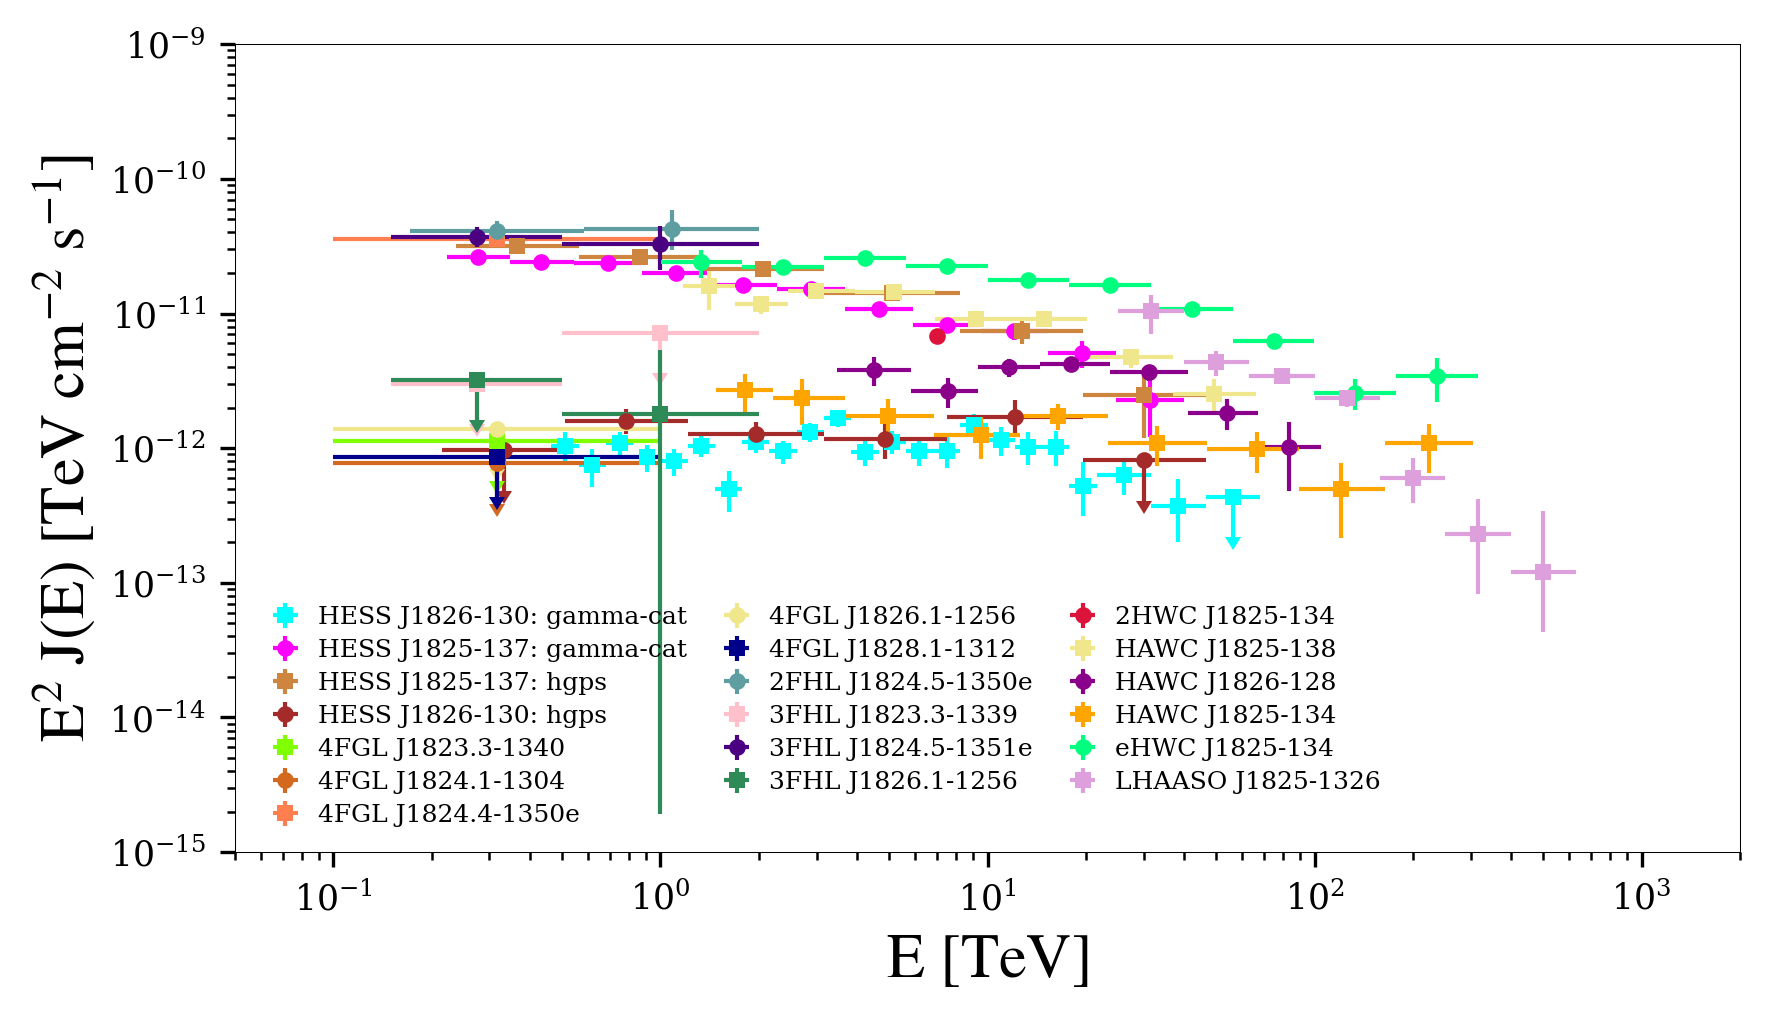

In [35]:
plot_limits = dict(
    energy_bounds = [5e-2, 2e3] * u.TeV,
    ylim = [1e-15, 1e-9]
)
show_SED(
    datasets=analysis.datasets, 
#     models=analysis.models,
    leg_style=leg_style,
    plot_limits=plot_limits)

In [36]:
len(analysis.datasets)

19

In [37]:
config_settings = analysis.config

In [38]:
datasets_analysis = [1,2,6,9,11,14,17,18]

In [39]:
datasets = Datasets()
for index in datasets_analysis:
    datasets.append(analysis.datasets[index])
for index, dataset in enumerate(datasets):
    print(f"{index}: {dataset.name}")

0: HESS J1825-137: gamma-cat
1: HESS J1825-137: hgps
2: 4FGL J1824.4-1350e
3: 2FHL J1824.5-1350e
4: 3FHL J1824.5-1351e
5: HAWC J1825-138
6: eHWC J1825-134
7: LHAASO J1825-1326


In [40]:
analysis.datasets = datasets
analysis.models = analysis.datasets.models

Reading model.
Models

Component 0: SkyModel

  Name                      : HESS_J1825-137_gamma-cat_ecpl
  Datasets names            : HESS J1825-137: gamma-cat
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.260   +/-    0.03             
    amplitude                     :   2.10e-11   +/- 5.0e-13 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.040   +/-    0.01 1 / TeV     
    alpha                 (frozen):      1.000                   

Component 1: SkyModel

  Name                      : HESS_J1825-137_hgps_ecpl
  Datasets names            : HESS J1825-137: hgps
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.151   +/-    0.06             
   

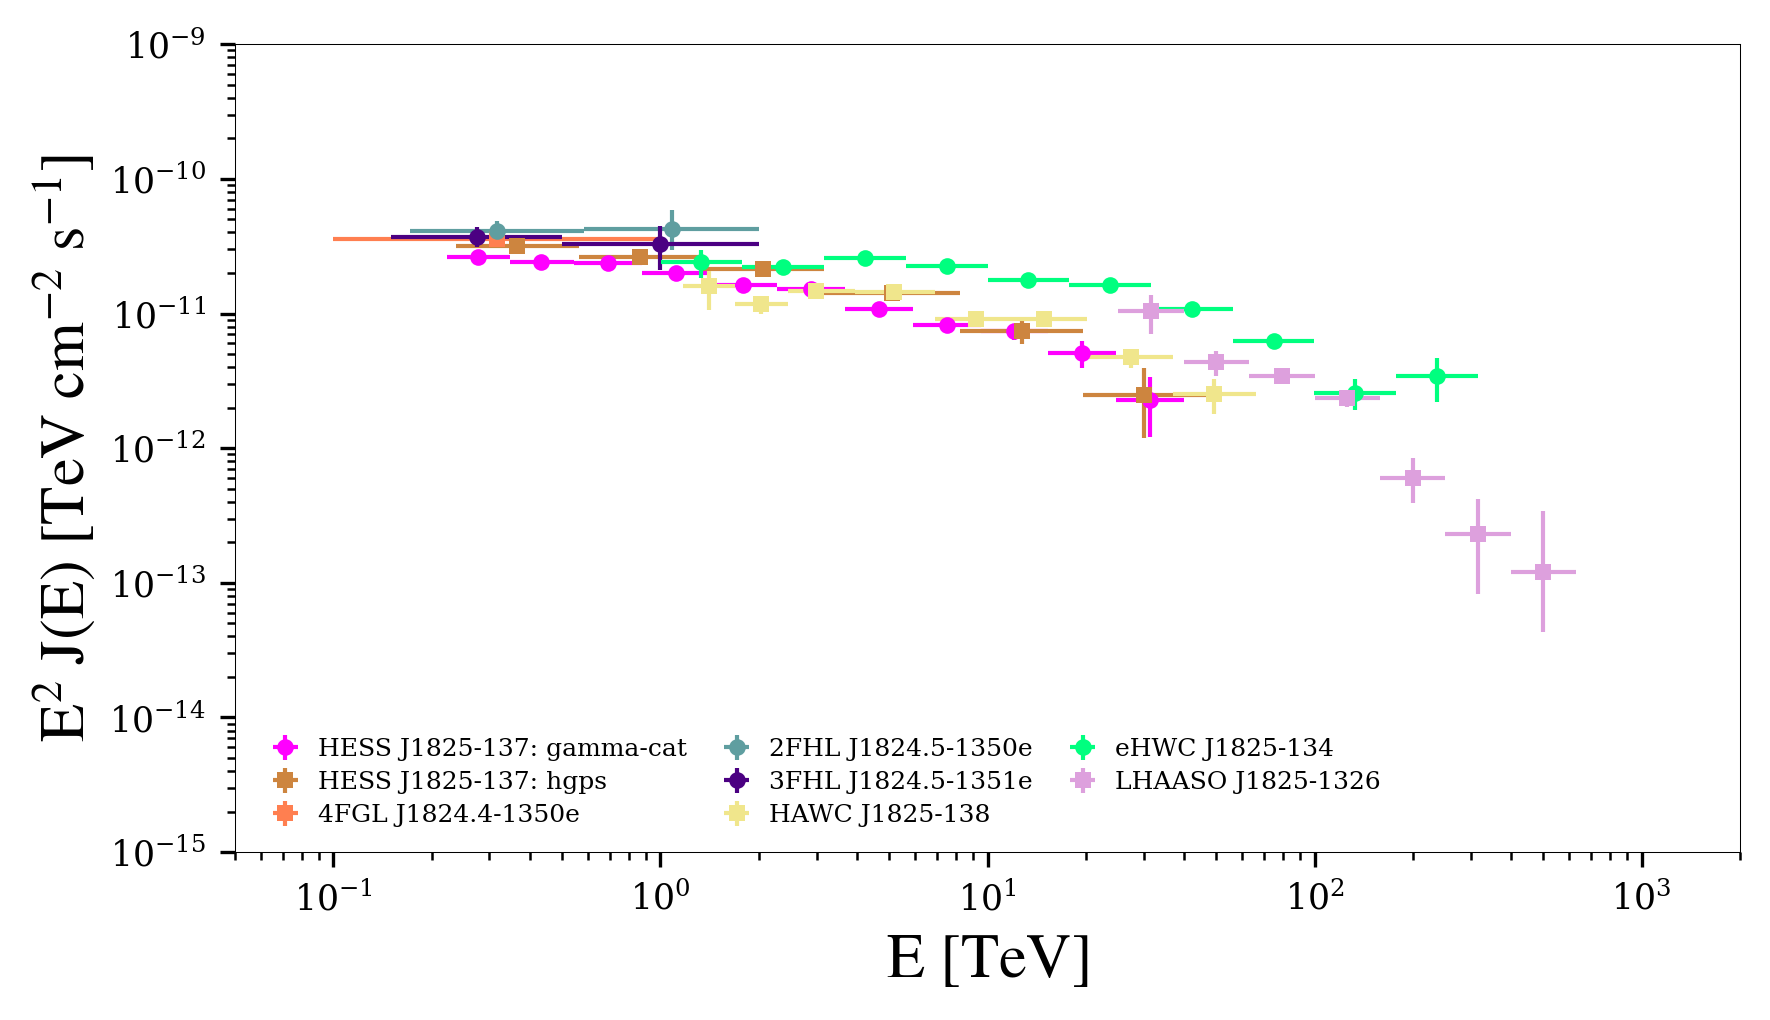

In [41]:
show_SED(
    datasets=analysis.datasets, 
    leg_style=leg_style,
    plot_limits=plot_limits)

In [42]:
analysis.write_datasets(path_file=analysis_path)

In [43]:
datasets = analysis.read_datasets(path_file=analysis_path)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
